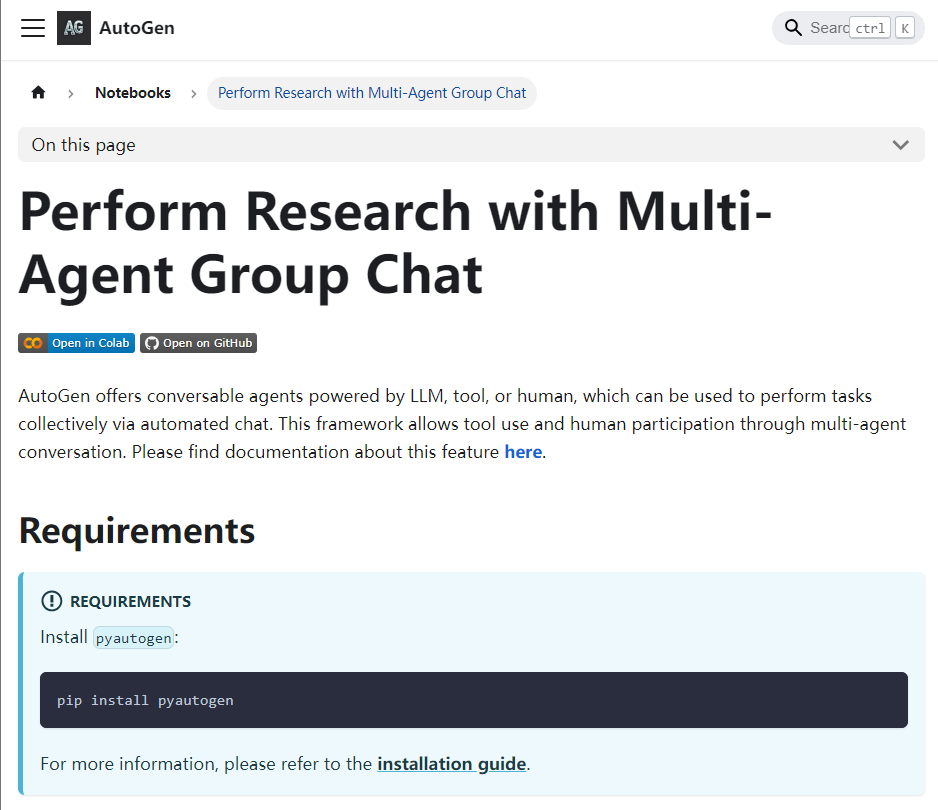

https://microsoft.github.io/autogen/docs/notebooks/agentchat_groupchat_research

In [1]:
import autogen

In [2]:
mistral = {
    "config_list": [
        {
            "model": "TheBloke/Mistral-7B-Instruct-v0.2-GGUF",
            "base_url": "http://localhost:1234/v1",
            "api_key": "lm-studio",
        },
    ],
    "cache_seed": None,  # Disable caching.
}

config_list = mistral

print("LLM models: ", mistral)

LLM models:  {'config_list': [{'model': 'TheBloke/Mistral-7B-Instruct-v0.2-GGUF', 'base_url': 'http://localhost:1234/v1', 'api_key': 'lm-studio'}], 'cache_seed': None}


below original code

In [3]:
user_proxy = autogen.UserProxyAgent(
    name="Admin",
    system_message="A human admin. Interact with the planner to discuss the plan. Plan execution needs to be approved by this admin.",
    code_execution_config=False,
)
engineer = autogen.AssistantAgent(
    name="Engineer",
    llm_config=config_list,
    system_message="""Engineer. You follow an approved plan. You write python/shell code to solve tasks. Wrap the code in a code block that specifies the script type. The user can't modify your code. So do not suggest incomplete code which requires others to modify. Don't use a code block if it's not intended to be executed by the executor.
Don't include multiple code blocks in one response. Do not ask others to copy and paste the result. Check the execution result returned by the executor.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
""",
)
scientist = autogen.AssistantAgent(
    name="Scientist",
    llm_config=config_list,
    system_message="""Scientist. You follow an approved plan. You are able to categorize papers after seeing their abstracts printed. You don't write code.""",
)
planner = autogen.AssistantAgent(
    name="Planner",
    system_message="""Planner. Suggest a plan. Revise the plan based on feedback from admin and critic, until admin approval.
The plan may involve an engineer who can write code and a scientist who doesn't write code.
Explain the plan first. Be clear which step is performed by an engineer, and which step is performed by a scientist.
""",
    llm_config=config_list,
)
executor = autogen.UserProxyAgent(
    name="Executor",
    system_message="Executor. Execute the code written by the engineer and report the result.",
    human_input_mode="NEVER",
    code_execution_config={
        "last_n_messages": 3,
        "work_dir": "paper",
        "use_docker": False,
    },  # Please set use_docker=True if docker is available to run the generated code. Using docker is safer than running the generated code directly.
)
critic = autogen.AssistantAgent(
    name="Critic",
    system_message="Critic. Double check plan, claims, code from other agents and provide feedback. Check whether the plan includes adding verifiable info such as source URL.",
    llm_config=config_list,
)
groupchat = autogen.GroupChat(
    agents=[user_proxy, engineer, scientist, planner, executor, critic], messages=[], max_round=50
)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=config_list)

below changed code

In [4]:
from autogen import UserProxyAgent, AssistantAgent, GroupChat, GroupChatManager

cco = UserProxyAgent(
    name="CCO",
    system_message="Chief Compliance Officer. Ensure that the bank adheres to all AML regulations and compliance standards. Provide guidance and approval on AML policy.",
    code_execution_config=False,
)

compliance_manager = AssistantAgent(
    name="Compliance Manager",
    llm_config=config_list,
    system_message="Compliance Manager. Assist in the creation and implementation of the AML policy. Ensure it meets regulatory requirements and aligns with internal compliance standards.",
)

coo = AssistantAgent(
    name="COO",
    llm_config=config_list,
    system_message="Chief Operating Officer. Ensure that the operational aspects of the AML policy are practical and can be effectively implemented within the bank's operations.",
)

operations_manager = AssistantAgent(
    name="Operations Manager",
    llm_config=config_list,
    system_message="Operations Manager. Oversee the daily operations to ensure that the AML policy is followed and integrated seamlessly into existing processes.",
)

general_manager = AssistantAgent(
    name="General Manager",
    llm_config=config_list,
    system_message="General Manager. Oversee the overall operations and management of the bank. Ensure that the AML policy is comprehensive and aligns with the bank's strategic goals.",
)

groupchat = GroupChat(
        agents=[cco, compliance_manager, coo, operations_manager, general_manager],
        messages=[],
        max_round=12,
        speaker_selection_method="round_robin",
        allow_repeat_speaker=False,
)

manager = GroupChatManager(groupchat=groupchat, llm_config=config_list)

cco.initiate_chat(
    manager,
    message={'content':"how to create a suitable AML policy on transactions"},
)


CCO (to chat_manager):

how to create a suitable AML policy on transactions

--------------------------------------------------------------------------------
Compliance Manager (to chat_manager):

 Creating a suitable Anti-Money Laundering (AML) policy for transactions involves several steps to ensure that your organization complies with relevant regulations and minimizes the risk of money laundering or terrorist financing. Here's a step-by-step guide to help you create an effective AML policy:

1. Understand the Regulatory Framework: Familiarize yourself with the applicable anti-money laundering laws, regulations, and guidelines in your jurisdiction. This may include the Bank Secrecy Act (BSA), USA PATRIOT Act, and FinCEN rules in the United States or the Money Laundering Regulations 2017 in the United Kingdom.

2. Define Key Terms: Clearly define key terms used in your AML policy to ensure that all employees understand their meanings. These may include "politically exposed person" (P

ChatResult(chat_id=None, chat_history=[{'content': 'how to create a suitable AML policy on transactions', 'role': 'assistant'}, {'content': ' Creating a suitable Anti-Money Laundering (AML) policy for transactions involves several steps to ensure that your organization complies with relevant regulations and minimizes the risk of money laundering or terrorist financing. Here\'s a step-by-step guide to help you create an effective AML policy:\n\n1. Understand the Regulatory Framework: Familiarize yourself with the applicable anti-money laundering laws, regulations, and guidelines in your jurisdiction. This may include the Bank Secrecy Act (BSA), USA PATRIOT Act, and FinCEN rules in the United States or the Money Laundering Regulations 2017 in the United Kingdom.\n\n2. Define Key Terms: Clearly define key terms used in your AML policy to ensure that all employees understand their meanings. These may include "politically exposed person" (PEP), "beneficial owner," and "red flags."\n\n3. Est